AttributeError: 'Line2D' object has no property 'xlabel'

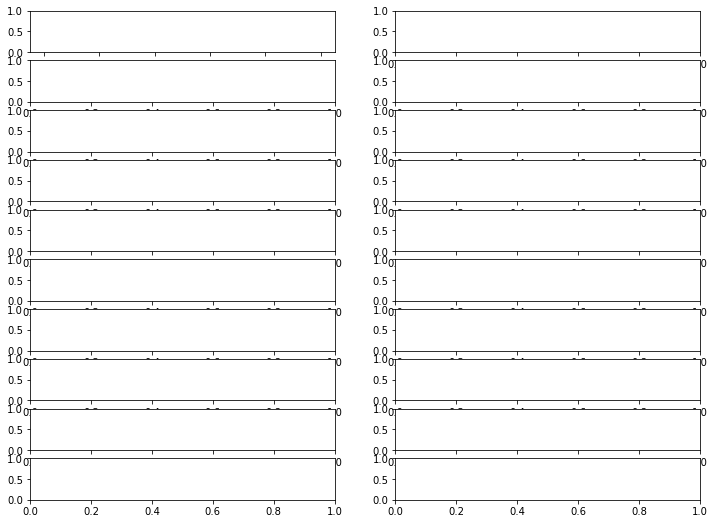

In [1]:
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates

def my_plot(
        df,
        rot=45,
        dt_fmt="%d.%m.%y",
        subplots_adjust_args=dict(hspace=1, wspace=.3, top=2, bottom=0.2),
        **kwargs):
    ncols = df["Location"].nunique()
    nrows = df["Type"].nunique()
    f, axes = plt.subplots(nrows, ncols, **kwargs)
    for col, loc in enumerate(df["Location"].unique()):
        d = df.query("Location == @loc")
        for row, typ in enumerate(d["Type"].unique()):
            (d
             .set_index("Date")
             .query("Type == @typ")
             [["Price"]]
             .plot(grid=True, rot=rot, ax=axes[row, col], title=f"{loc}, {typ}"))
            if not kwargs.get("sharex", False):
                axes[row, col].xaxis.set_major_formatter(mdates.DateFormatter(dt_fmt))
    plt.subplots_adjust(**subplots_adjust_args)
    # plt.tight_layout()


df = (pd
      .read_csv('ap-northeast-1.csv', parse_dates=["Date"],
                names=['Date','Type','OS', 'Location', 'Price'])
      .query("OS == 'Windows' and Type.str[0] == 'i'"))

my_plot(df, rot=0, subplots_adjust_args=dict(hspace=.7, wspace=.3, top=1.4), 
        dt_fmt="%d.%m", figsize=(12,9), sharex=False, sharey=False)